In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Churn_modelling.csv')

In [6]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [11]:
def visualization(x,y,xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x,y], color=['red','green'],label=['exit','not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel('No of customers', fontsize=20)
    plt.legend()

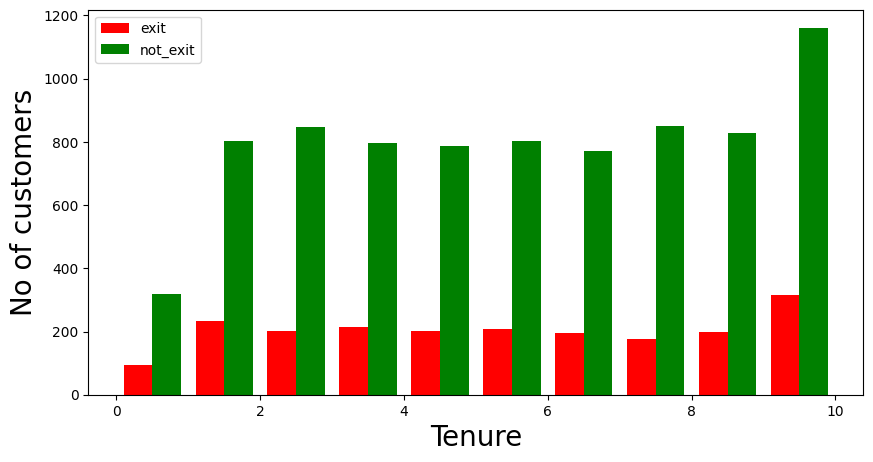

In [12]:
exited=df[df['Exited']==1]['Tenure']
not_exited=df[df['Exited']==0]['Tenure']
visualization(exited,not_exited,'Tenure')

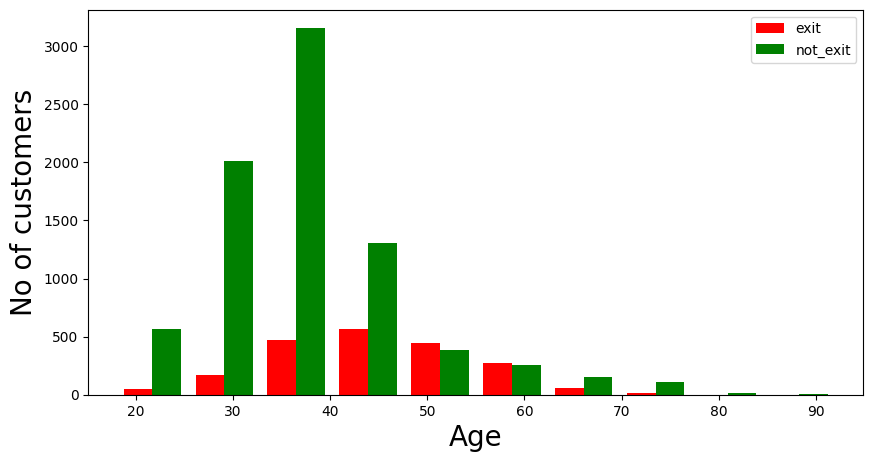

In [13]:
exited=df[df['Exited']==1]['Age']
not_exited=df[df['Exited']==0]['Age']
visualization(exited,not_exited,'Age')

In [14]:
states=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)
df=pd.concat([df,gender,states],axis=1)

In [15]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
import keras

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
classifier=Sequential()
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

In [26]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [27]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

In [28]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5084 - accuracy: 0.7956
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4187 - accuracy: 0.7961
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.7961
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8061
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8303
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3881 - accuracy: 0.8324
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8343
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8353
Epoch 9/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8473
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3696 - accuracy: 0.8483

In [33]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 [==============================] - 0s 2ms/step


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
cm = confusion_matrix(y_test,y_pred)

In [36]:
accuracy = accuracy_score(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truth')

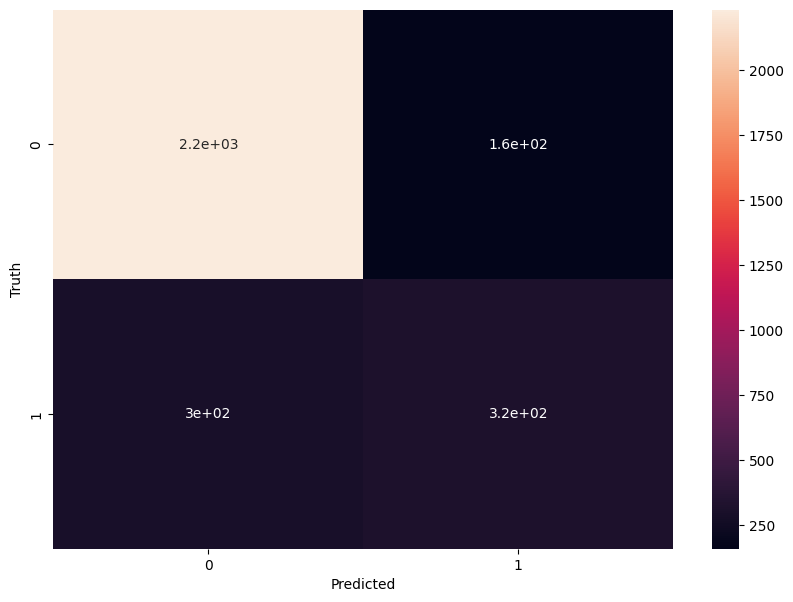

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2390
           1       0.67      0.52      0.58       610

    accuracy                           0.85      3000
   macro avg       0.77      0.73      0.74      3000
weighted avg       0.84      0.85      0.84      3000

